In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import math

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("house_price_regression_dataset.csv")

In [3]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [4]:
print(df.info(),"\n",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB
None 
 (1000, 8)


In [5]:
cols=['Num_Bedrooms','Num_Bathrooms','Garage_Size','Neighborhood_Quality']

for col in cols:
    print(f"{col}: ",df[col].unique(),"\n")

Num_Bedrooms:  [2 3 1 5 4] 

Num_Bathrooms:  [1 3 2] 

Garage_Size:  [0 1 2] 

Neighborhood_Quality:  [ 5  6  9  8  1  2  4 10  7  3] 



In [6]:
df['House_Price']=df['House_Price'].apply(lambda x:round(x))
df['Built_Age']=2025-df['Year_Built']
df.drop('Year_Built',axis=1,inplace=True)
df.head()


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Built_Age
0,1360,2,1,0.599637,0,5,262383,44
1,4272,3,3,4.753014,1,6,985261,9
2,3592,1,2,3.634823,0,9,777977,9
3,966,1,2,2.730667,1,8,229699,48
4,4926,2,1,4.699073,0,8,1041741,32


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Square_Footage,1000.0,2815.422000,1255.514921,503.000000,1749.500000,2862.50000,3849.500000,4.999000e+03
Num_Bedrooms,1000.0,2.990000,1.427564,1.000000,2.000000,3.00000,4.000000,5.000000e+00
Num_Bathrooms,1000.0,1.973000,0.820332,1.000000,1.000000,2.00000,3.000000,3.000000e+00
Lot_Size,1000.0,2.778087,1.297903,0.506058,1.665946,2.80974,3.923317,4.989303e+00
Garage_Size,1000.0,1.022000,0.814973,0.000000,0.000000,1.00000,2.000000,2.000000e+00
Neighborhood_Quality,1000.0,5.615000,2.887059,1.000000,3.000000,6.00000,8.000000,1.000000e+01
House_Price,1000.0,618861.004000,253568.063720,111627.000000,401647.750000,628267.50000,827141.000000,1.108237e+06
Built_Age,1000.0,38.450000,20.632916,3.000000,20.750000,39.00000,56.000000,7.500000e+01


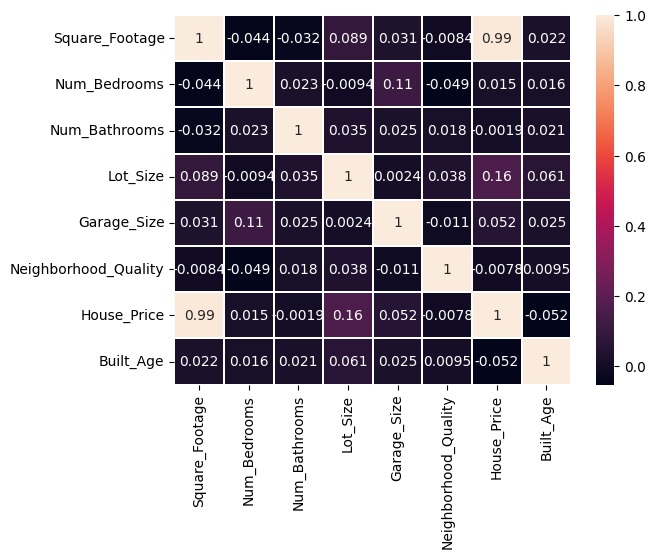

In [8]:
sns.heatmap(df.corr(),annot=True,linewidths=0.2)
plt.show()

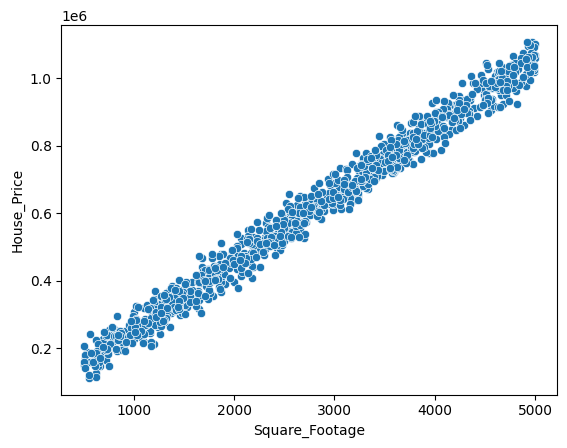

In [9]:
sns.scatterplot(data=df,x="Square_Footage",y="House_Price")
plt.show()

<Figure size 1000x800 with 0 Axes>

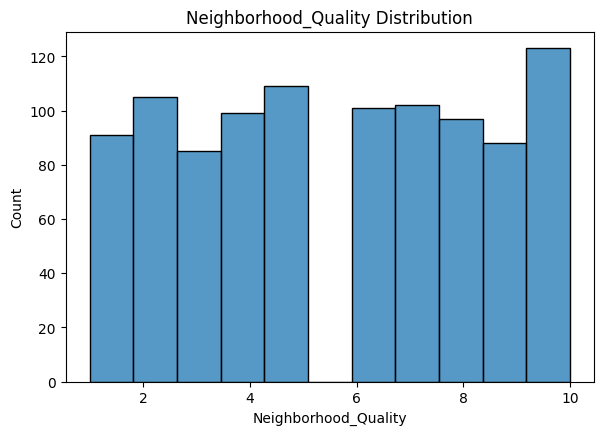

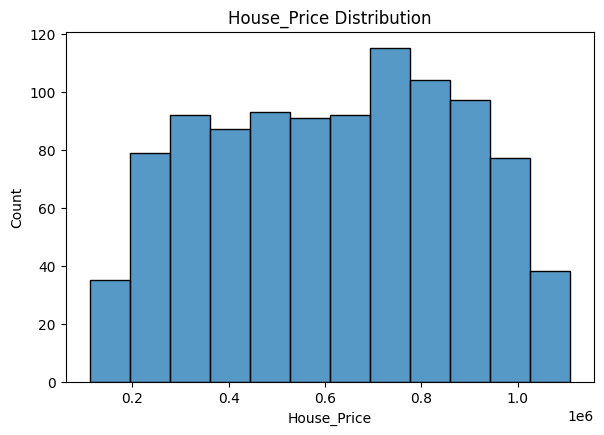

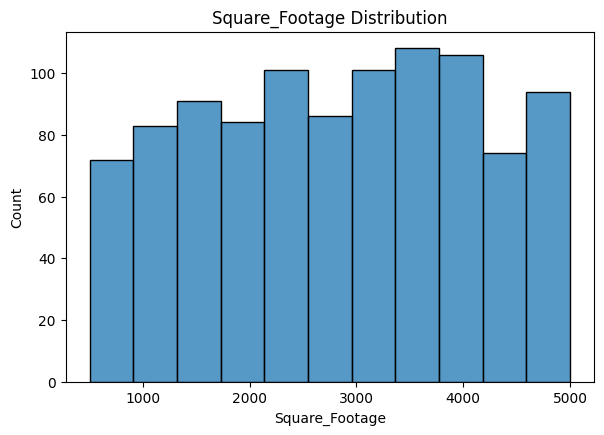

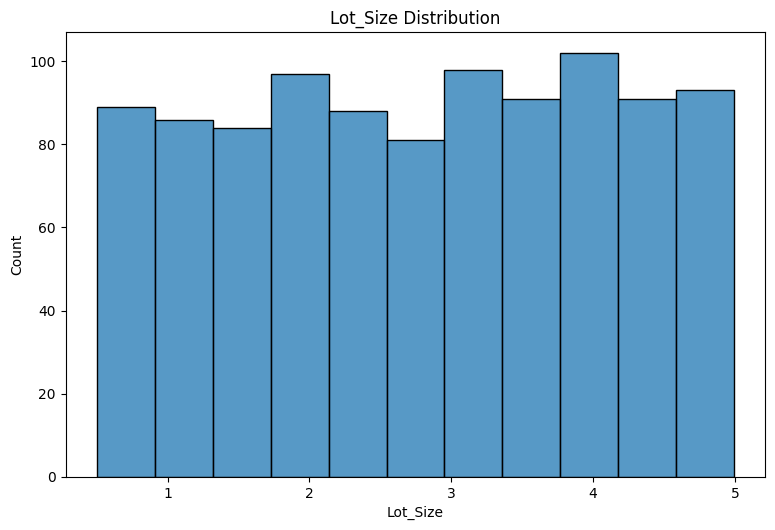

In [10]:
hist_cols=['Neighborhood_Quality','House_Price','Square_Footage','Lot_Size']
plt.figure(figsize=(10, 8))
for i,col in enumerate(hist_cols):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,i+1)
    sns.histplot(data=df,x=hist_cols[i],kde=False)
    plt.title(f"{hist_cols[i]} Distribution")
plt.tight_layout()    
plt.show()

In [11]:
Q3=df.quantile(0.75)
Q1=df.quantile(0.25)
IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

outlier_mask=(df<lower) | (df>upper)
df_outliers = df[outlier_mask.any(axis=1)]
df_outliers

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Built_Age


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression,RidgeCV,LassoCV,ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [13]:
X=df.drop('House_Price',axis=1)
y=df['House_Price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=21)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



In [14]:
def run_model(model):
    
    pip=Pipeline([
        ('model',model)
    ])
    pip.fit(X_train,y_train)
    y_pred=pip.predict(X_test)
    
    r2=r2_score(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    mas=mean_absolute_error(y_test,y_pred)
    rmse=math.sqrt(mse)
    print('R2: ',r2)
    print('MSE: ',mse)
    print('MAS: ',mas)
    print('RMSE: ',rmse)
    



LINEAR REGRESSION

In [15]:
regressor=LinearRegression()
run_model(regressor)



R2:  0.9983634965126518
MSE:  99530784.06391259
MAS:  8044.256317949336
RMSE:  9976.51161799116


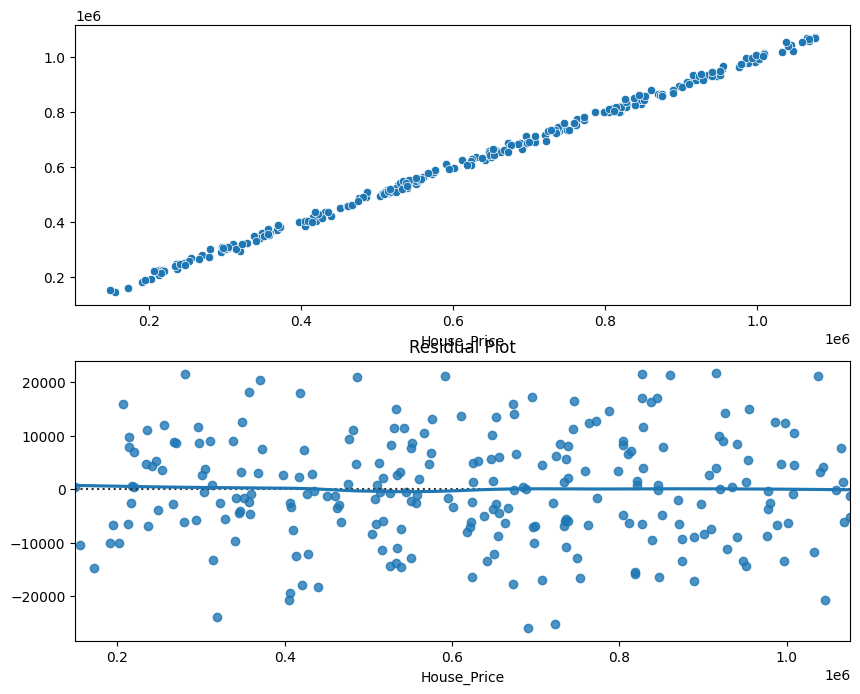

In [16]:

regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)

sns.scatterplot(x=y_test,y=y_pred)


plt.subplot(2,1,2)

sns.residplot(x=y_test, y=y_pred, lowess=True)
plt.title('Residual Plot')

plt.show()

RIDGE LASSO ELASTICNET

In [17]:
print("\n*****RIDGE*****\n")
run_model(RidgeCV(cv=5)) 
print("\n*****LASSO*****\n")
run_model(LassoCV(cv=5)) 
print("\n*****ELASTICNET*****\n")
run_model(ElasticNetCV(cv=5)) 
print("\n***********************\n")


*****RIDGE*****

R2:  0.9983626454967167
MSE:  99582542.14687106
MAS:  8045.691432448453
RMSE:  9979.105277872915

*****LASSO*****

R2:  0.9983386594947654
MSE:  101041350.88099809
MAS:  8121.318600374919
RMSE:  10051.932693815557

*****ELASTICNET*****

R2:  0.007476946888451463
MSE:  60364428454.57677
MAS:  209033.36917938205
RMSE:  245691.73460777383

***********************



LET SET A RATIO FOR ELASTICNET

In [18]:
my_range=np.linspace(0,1,9)
my_range=np.round(my_range,2)

for i in my_range[1:]:
    print(f"***** For {i} *****\n")
    run_model(ElasticNetCV(cv=5,l1_ratio=i))
    print("\n")
    


***** For 0.12 *****

R2:  0.0006778198148432724
MSE:  60777945721.00369
MAS:  209749.67351919893
RMSE:  246531.8351065511


***** For 0.25 *****

R2:  0.002234758098575984
MSE:  60683254026.59727
MAS:  209585.86439599833
RMSE:  246339.7126461693


***** For 0.38 *****

R2:  0.004438241187649683
MSE:  60549240013.65895
MAS:  209353.80973466064
RMSE:  246067.5517285019


***** For 0.5 *****

R2:  0.007476946888451463
MSE:  60364428454.57677
MAS:  209033.36917938205
RMSE:  245691.73460777383


***** For 0.62 *****

R2:  0.012404458179198774
MSE:  60064741306.92116
MAS:  208512.6924432598
RMSE:  245081.0912880085


***** For 0.75 *****

R2:  0.02295317669745789
MSE:  59423177000.3928
MAS:  207393.60527919215
RMSE:  243768.69569407962


***** For 0.88 *****

R2:  0.05524439743498366
MSE:  57459251751.69406
MAS:  203929.42762971093
RMSE:  239706.59513599967


***** For 1.0 *****

R2:  0.9983386594947654
MSE:  101041350.88099809
MAS:  8121.318600374919
RMSE:  10051.932693815557




In [19]:
### 1 is optimum value

run_model(ElasticNetCV(cv=5,l1_ratio=1))

R2:  0.9983386594947654
MSE:  101041350.88099809
MAS:  8121.318600374919
RMSE:  10051.932693815557


KNN REGRESSOR

In [20]:
run_model(KNeighborsRegressor())  ###WITHOUT TUNıNG

R2:  0.8898448596253483
MSE:  6699544226.407199
MAS:  66363.50799999999
RMSE:  81850.74359104625


In [21]:
params_knn={
    'n_neighbors':[5],
    'weights':['uniform','distance'],
    'algorithm': ['ball_tree','kd_tree','brute','auto'],
    
}

In [22]:
grid=GridSearchCV(estimator=KNeighborsRegressor(),cv=5,n_jobs=-1,param_grid=params_knn)
run_model(grid)  ### WITH TUNING
grid.best_params_

R2:  0.8955202416406512
MSE:  6354372201.897418
MAS:  64359.483619047125
RMSE:  79714.31616652945


{'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}

DECISION TREE REGRESSOR

In [23]:
run_model(DecisionTreeRegressor()) ### WITHOUT TUNING

R2:  0.9842280579244694
MSE:  959236428.84
MAS:  24144.672
RMSE:  30971.542241871004


In [24]:
params_dr={
    'criterion':['squad_error','firedman_mse','absolute_error','poisson'],
    'splitter': ['best','random'],
    'max_features':['auto','sqrt','log2']
}

In [25]:
grid=GridSearchCV(estimator=DecisionTreeRegressor(),
                            param_grid=params_dr,
                                    cv=5,
                                        n_jobs=-1,
                                            scoring='r2')
run_model(grid)
grid.best_params_


R2:  0.9116926103395225
MSE:  5370782158.116
MAS:  50737.06
RMSE:  73285.62040479701


{'criterion': 'absolute_error', 'max_features': 'log2', 'splitter': 'best'}

R2:  0.984216280655853
MSE:  959952712.544
MAS:  23852.512
RMSE:  30983.103662222093


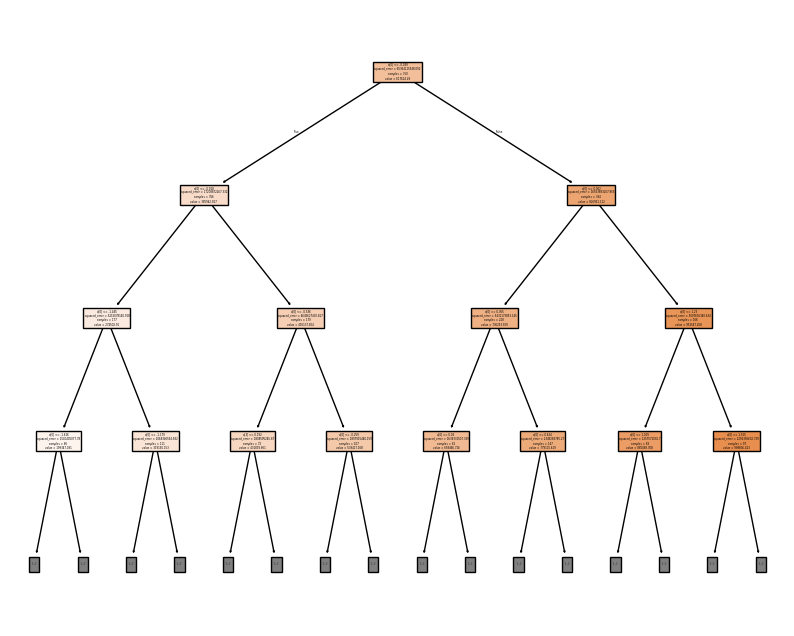

In [26]:
from sklearn.tree import plot_tree

tree=DecisionTreeRegressor() ### MORE HIGH r2 SCORE THAN TUNING
run_model(tree)
plt.figure(figsize=(10,8))
plot_tree(tree,max_depth=3,filled=True) 
plt.show()



SVM

In [27]:
from sklearn.svm import SVR,LinearSVR

svr=SVR(kernel='linear')
run_model(svr) ### WITHOUT TUNING


R2:  0.004648254561664178
MSE:  60536467174.52896
MAS:  208957.69281701473
RMSE:  246041.59643143465


In [28]:
params_svr={
    'kernel': ['linear','poly','rbf','sigmoid'],
    'degree': [1,2,3,4,5,6,7,8,9,10],
    'gamma': ['scale','auto'],
    'C': [0.1,0.01,1,2,5,10,50]
    
}

In [29]:
grid=GridSearchCV(estimator=SVR(),param_grid=params_svr,cv=5,n_jobs=-1,scoring='r2')
run_model(grid) ### WITH TUNING
grid.best_params_

R2:  0.23681775716207432
MSE:  46416110689.99094
MAS:  182817.13771746846
RMSE:  215443.9850401745


{'C': 50, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

In [30]:
from lazypredict.Supervised import LazyRegressor

In [31]:
lazy=LazyRegressor(verbose=0,ignore_warnings=False,custom_metric=None)
models,pred=lazy.fit(X_train,X_test,y_train,y_test)
models

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 600
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 7
[LightGBM] [Info] Start training from score 617624.480000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LinearRegression,1.00,1.00,9976.51,0.01
Lars,1.00,1.00,9976.51,0.02
RANSACRegressor,1.00,1.00,9976.51,0.01
LassoLarsIC,1.00,1.00,9976.51,0.01
TransformedTargetRegressor,1.00,1.00,9976.51,0.01
Lasso,1.00,1.00,9976.68,0.01
LassoLars,1.00,1.00,9976.72,0.01
BayesianRidge,1.00,1.00,9976.77,0.01
HuberRegressor,1.00,1.00,9977.97,0.02
